### Thinking1
什么是反向传播中的链式法则

答：反向传播中的链式法则指在将误差反向传播时，第n层的误差等于第n层到第n+1层的权重矩阵的转置乘以第n+1层的误差，得到误差后利用误差可以计算损失函数关于对应权重的梯度，用以更新对应权重。

### Thinking2
请列举几种常见的激活函数，激活函数有什么作用

答：常见的激活函数有sigmoid，relu，tanh，leaky relu，maxout，softmax。由于激活函数的特点是非线性，而大多数的数据分布都是非线性的，所以使用激活函数可以强化网络的学习能力。而如果不使用激活函数，神经网络将仍然是一个线性模型。

### Thinking3
利用梯度下降法训练神经网络，发现模型loss不变，可能有哪些问题？怎么解决？

答：可能遇到的问题有：  
（1）梯度消失或梯度爆炸：梯度消失可以更换激活函数，梯度爆炸则可以对输出进行最大值约束；  
（2）正则化过度，导致模型欠拟合：可以减小正则化项，或在模型训练初期不采用正则化项；  
（3）学习率过大或过小：除了使用优化器外，还可以在模型趋于收敛时适当调节学习率，以寻找更好的最优点；  
（4）batch size太大，导致训练缓慢：可以适当减小batch size，但如果选取过小的值可能会导致难以收敛。

### Action1
使用Pytorch编写神经网络，完成boston房价预测问题
1）数据加载：from sklearn.datasets import load_boston
2）网络结构：
l1 = Linear(X, W1, b1)
s1 = Relu(l1)
l2 = Linear(s1, W2, b2)
cost = MSE(y, l2)
隐藏层维度为10

In [10]:
from sklearn.datasets import load_boston

# 载入数据
data = load_boston()
X = data['data']
y = data['target']
y = y.reshape(-1,1) # 让y变成只有一列，行数不知道多少

# 数据探索
print(X.shape)
print(y[:5])

(506, 13)
[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]


In [11]:
# 数据规范化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

# 将数据放入torch
import torch
X = torch.from_numpy(X).type(torch.FloatTensor) # 对应于numpy中的.astype()
y = torch.from_numpy(y).type(torch.FloatTensor)
y[:5]

tensor([[24.0000],
        [21.6000],
        [34.7000],
        [33.4000],
        [36.2000]])

In [12]:
# 切分数据集
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [19]:
# 构造网络，输入层维度13，隐藏层维度10，输出层维度1
from torch import nn
model = nn.Sequential(nn.Linear(13,10),
                     nn.ReLU(),
                     nn.Linear(10,1))

# 选择优化器Adam和损失函数MSE
Loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # Adam的learning rate常用0.01和0.001

# 进行训练
epochs = 300
loss_list = []
for i in range(epochs):
    # 前向传播
    y_pred = model(train_X)
    # 计算loss
    loss = Loss(train_y, y_pred)
    loss_list.append(loss.item())
    # 梯度清零（pytorch特有）
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 权重更新
    optimizer.step()
    
# 测试
output = model(test_X)
pred = output.detach().numpy()
pred[:5]

array([[17.975628],
       [28.258583],
       [28.686777],
       [21.547297],
       [19.91484 ]], dtype=float32)

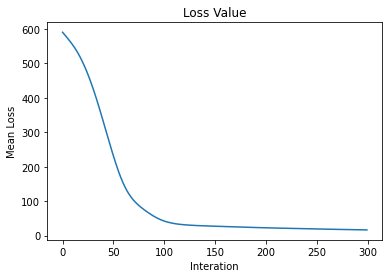

In [23]:
# 进行可视化
import matplotlib.pyplot as plt
import numpy as np
# 查看loss的变化情况
plt.plot(np.arange(epochs),np.array(loss_list))
plt.title('Loss Value')
plt.xlabel('Interation')
plt.ylabel('Mean Loss')
plt.show()

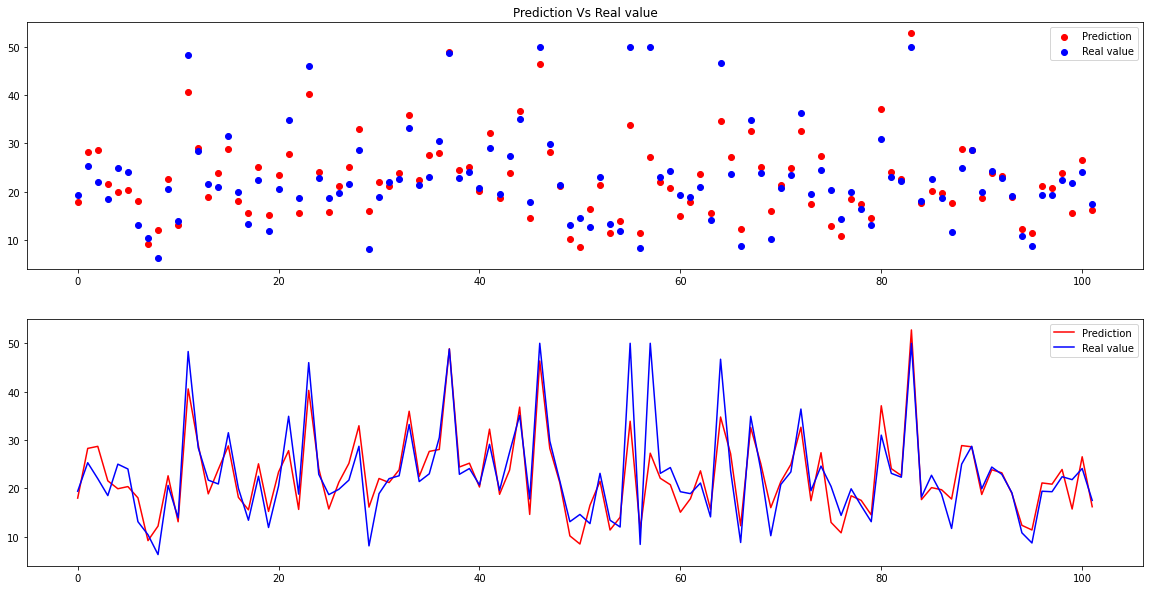

In [57]:
# 比对预测值与实际值
x = np.arange(test_X.shape[0])
y_1 = np.array(pred)
y_2 = test_y
# 散点图
fig = plt.figure(figsize=(20,10))
scatters = plt.subplot(211)
s_1 = plt.scatter(x, y_1, c='red')
s_2 = plt.scatter(x, y_2, c='blue')
plt.legend(['Prediction','Real value'])
plt.title('Prediction Vs Real value')
# 折线图
lines = plt.subplot(212)
l_1 = plt.plot(x, y_1, c='red')
l_2 = plt.plot(x, y_2, c='blue')
plt.legend(['Prediction','Real value'])
plt.show()

### Action2
对移动推荐系统进行可视化数据探索
数据集https://tianchi.aliyun.com/competition/entrance/231522/information
tianchi_fresh_comp_train_item.csv
tianchi_fresh_comp_train_user.csv
比如时间规律统计，4种行为类别的对比…

In [ ]:
# import gc
# import pandas as pd
# from datetime import datetime
# dateparser = lambda dates: datetime.strptime(dates,'%Y-%m-%d %H')
# for df in pd.read_csv(open('./fresh_comp_offline/tianchi_fresh_comp_train_user.csv', 'r'),
#                       parse_dates=['time'],
#                       date_parser=dateparser,
#                       index_col=['time'],     
#                       chunksize = 10000):
#         print(df.head())
#         del df
#         gc.collect()

In [110]:
# 载入数据
import pandas as pd
data = pd.read_csv('./fresh_comp_offline/tianchi_fresh_comp_train_user.csv')
print(data.shape)
data.head()

(23291027, 6)


,user_id,item_id,behavior_type,user_geohash,item_category,time
0,10001082,285259775,1,97lk14c,4076,2014-12-08 18
1,10001082,4368907,1,NaN,5503,2014-12-12 12
2,10001082,4368907,1,NaN,5503,2014-12-12 12
3,10001082,53616768,1,NaN,9762,2014-12-02 15
4,10001082,151466952,1,NaN,5232,2014-12-12 11


In [111]:
# 取小样本
df = data.sample(n=10000,random_state=1)
df['behavior_type'].value_counts()

1    9378
3     311
2     204
4     107
Name: behavior_type, dtype: int64

#### 时间规律统计

##### 用户每天操作次数

In [112]:
# 将time字段设置为pandas中的datetime类型，并以time为index
df.loc[:,'time'] = pd.to_datetime(df.loc[:,'time'])
df.index = df.loc[:,'time']
df.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
time,,,,,,
2014-11-28 22:00:00,46668974,193858601,1,NaN,5894,2014-11-28 22:00:00
2014-11-26 22:00:00,21079914,399373821,1,NaN,2825,2014-11-26 22:00:00
2014-12-06 13:00:00,130053173,19900221,1,NaN,7957,2014-12-06 13:00:00
2014-11-30 20:00:00,55643672,186143294,1,NaN,5894,2014-11-30 20:00:00
2014-12-06 11:00:00,138625405,12732043,1,NaN,5503,2014-12-06 11:00:00


In [113]:
# 查询某一天
df['2014-12-08']

,user_id,item_id,behavior_type,user_geohash,item_category,time
time,,,,,,
2014-12-08 16:00:00,140653061,152699119,1,NaN,444,2014-12-08 16:00:00
2014-12-08 18:00:00,38026943,92622667,1,NaN,5752,2014-12-08 18:00:00
2014-12-08 23:00:00,3758275,160350415,1,9snohsh,13670,2014-12-08 23:00:00
2014-12-08 12:00:00,46208357,392438938,1,NaN,5399,2014-12-08 12:00:00
2014-12-08 15:00:00,136889049,25971697,1,NaN,5395,2014-12-08 15:00:00
...,...,...,...,...,...,...
2014-12-08 10:00:00,131626640,216850471,1,NaN,1863,2014-12-08 10:00:00
2014-12-08 21:00:00,121250534,259301265,1,NaN,6513,2014-12-08 21:00:00
2014-12-08 03:00:00,20289057,204070021,1,NaN,5894,2014-12-08 03:00:00


In [114]:
# 以“天”为单位统计点击次数
from collections import defaultdict
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
def show_by_day(df):
    count_by_day = defaultdict(int)
    # 从2014-11-18至2014-12-18
    start = '2014-11-17'
    temp_date = datetime.strptime(start, '%Y-%m-%d')
    delta = timedelta(days=1)
    for i in range(31):
        temp_date = temp_date + delta
        print(temp_date)
        # 将时间转换为字符串类型
        temp_str = temp_date.strftime('%Y-%m-%d')
        count_by_day[temp_str] += df[temp_str].shape[0]
    print(count_by_day)
    df_count_by_day = pd.DataFrame.from_dict(count_by_day, orient='index' , columns=['count'])
    plt.figure(figsize=(10,7))
    df_count_by_day['count'].plot(kind='bar')
    plt.legend()
    plt.grid(True)
    plt.show()

2014-11-18 00:00:00
2014-11-19 00:00:00
2014-11-20 00:00:00
2014-11-21 00:00:00
2014-11-22 00:00:00
2014-11-23 00:00:00
2014-11-24 00:00:00
2014-11-25 00:00:00
2014-11-26 00:00:00
2014-11-27 00:00:00
2014-11-28 00:00:00
2014-11-29 00:00:00
2014-11-30 00:00:00
2014-12-01 00:00:00
2014-12-02 00:00:00
2014-12-03 00:00:00
2014-12-04 00:00:00
2014-12-05 00:00:00
2014-12-06 00:00:00
2014-12-07 00:00:00
2014-12-08 00:00:00
2014-12-09 00:00:00
2014-12-10 00:00:00
2014-12-11 00:00:00
2014-12-12 00:00:00
2014-12-13 00:00:00
2014-12-14 00:00:00
2014-12-15 00:00:00
2014-12-16 00:00:00
2014-12-17 00:00:00
2014-12-18 00:00:00
defaultdict(<class 'int'>, {'2014-11-18': 309, '2014-11-19': 305, '2014-11-20': 276, '2014-11-21': 258, '2014-11-22': 298, '2014-11-23': 316, '2014-11-24': 310, '2014-11-25': 294, '2014-11-26': 275, '2014-11-27': 286, '2014-11-28': 305, '2014-11-29': 257, '2014-11-30': 306, '2014-12-01': 283, '2014-12-02': 349, '2014-12-03': 326, '2014-12-04': 287, '2014-12-05': 312, '2014-12-0

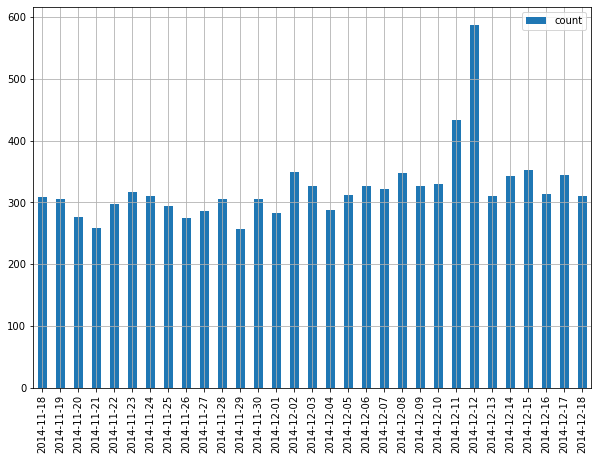

In [115]:
# 可视化
show_by_day(df)

##### 用户每天每类的操作次数

In [116]:
# 查询一小时
df['2014-12-08 01']

,user_id,item_id,behavior_type,user_geohash,item_category,time
time,,,,,,
2014-12-08 01:00:00,116922407,272751058,1,NaN,10894,2014-12-08 01:00:00
2014-12-08 01:00:00,115893188,89566740,1,NaN,10659,2014-12-08 01:00:00
2014-12-08 01:00:00,110507614,300886675,1,NaN,6054,2014-12-08 01:00:00
2014-12-08 01:00:00,37015415,103513273,1,NaN,242,2014-12-08 01:00:00
2014-12-08 01:00:00,115809773,213984878,1,NaN,6648,2014-12-08 01:00:00
2014-12-08 01:00:00,4121429,144970125,1,NaN,552,2014-12-08 01:00:00
2014-12-08 01:00:00,36603095,285215614,1,NaN,8877,2014-12-08 01:00:00


In [117]:
def show_by_hour(date):
    count_by_hour = {}
    for i in range(24):
        time_str = date + ' %02d' % i
        print(time_str)
        count_by_hour[time_str] = [0,0,0,0]
        temp = df[time_str]['behavior_type'].value_counts()
        for j in range(len(temp)):
            count_by_hour[time_str][temp.index[j]-1] += temp[temp.index[j]] # temp.index并非按顺序
    print(count_by_hour)
    df_count_by_hour = pd.DataFrame.from_dict(count_by_hour, orient='index')
    df_count_by_hour.plot(kind='bar')
    plt.legend()
    plt.grid(True)
    plt.show()

2014-12-12 00
2014-12-12 01
2014-12-12 02
2014-12-12 03
2014-12-12 04
2014-12-12 05
2014-12-12 06
2014-12-12 07
2014-12-12 08
2014-12-12 09
2014-12-12 10
2014-12-12 11
2014-12-12 12
2014-12-12 13
2014-12-12 14
2014-12-12 15
2014-12-12 16
2014-12-12 17
2014-12-12 18
2014-12-12 19
2014-12-12 20
2014-12-12 21
2014-12-12 22
2014-12-12 23
{'2014-12-12 00': [43, 2, 2, 5], '2014-12-12 01': [22, 0, 0, 0], '2014-12-12 02': [17, 0, 0, 0], '2014-12-12 03': [2, 0, 0, 0], '2014-12-12 04': [3, 0, 0, 0], '2014-12-12 05': [5, 0, 0, 0], '2014-12-12 06': [11, 0, 1, 0], '2014-12-12 07': [18, 0, 0, 1], '2014-12-12 08': [29, 0, 1, 0], '2014-12-12 09': [26, 0, 0, 3], '2014-12-12 10': [21, 0, 1, 0], '2014-12-12 11': [22, 3, 1, 0], '2014-12-12 12': [17, 1, 0, 0], '2014-12-12 13': [27, 0, 0, 0], '2014-12-12 14': [29, 0, 2, 0], '2014-12-12 15': [13, 0, 1, 0], '2014-12-12 16': [25, 1, 0, 0], '2014-12-12 17': [20, 0, 1, 0], '2014-12-12 18': [21, 0, 0, 0], '2014-12-12 19': [22, 2, 2, 1], '2014-12-12 20': [32, 1, 2

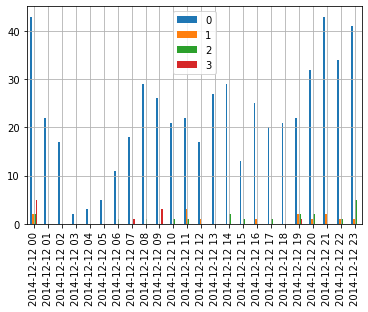

In [118]:
# 可视化
show_by_hour('2014-12-12')

##### 属于商品子集P的操作次数

In [121]:
# 读取商品子集P
df_p = pd.read_csv('./fresh_comp_offline/tianchi_fresh_comp_train_item.csv')
print(df_p.head())

# 以item_id为链接，合并df_p和df
df = pd.merge(df, df_p, on=['item_id']).set_index('time') # 留下交集部分并需要重新将时间设为索引
df.head()

     item_id item_geohash  item_category
0  100002303          NaN           3368
1  100003592          NaN           7995
2  100006838          NaN          12630
3  100008089          NaN           7791
4  100012750          NaN           9614


,user_id,item_id,behavior_type,user_geohash,item_category_x,item_geohash_x,item_category_y,item_geohash_y,item_category
time,,,,,,,,,
2014-12-03 02:00:00,109354262,224792502,3,NaN,5988,NaN,5988,NaN,5988
2014-12-10 15:00:00,23257726,155342285,1,9rfp023,5533,NaN,5533,NaN,5533
2014-11-27 17:00:00,118224516,274594534,1,NaN,6794,NaN,6794,NaN,6794
2014-12-15 22:00:00,114328130,297016002,1,NaN,7995,NaN,7995,NaN,7995
2014-12-12 23:00:00,36871109,321136236,1,99d5m4k,3064,NaN,3064,NaN,3064


2014-11-18 00:00:00
2014-11-19 00:00:00
2014-11-20 00:00:00
2014-11-21 00:00:00
2014-11-22 00:00:00
2014-11-23 00:00:00
2014-11-24 00:00:00
2014-11-25 00:00:00
2014-11-26 00:00:00
2014-11-27 00:00:00
2014-11-28 00:00:00
2014-11-29 00:00:00
2014-11-30 00:00:00
2014-12-01 00:00:00
2014-12-02 00:00:00
2014-12-03 00:00:00
2014-12-04 00:00:00
2014-12-05 00:00:00
2014-12-06 00:00:00
2014-12-07 00:00:00
2014-12-08 00:00:00
2014-12-09 00:00:00
2014-12-10 00:00:00
2014-12-11 00:00:00
2014-12-12 00:00:00
2014-12-13 00:00:00
2014-12-14 00:00:00
2014-12-15 00:00:00
2014-12-16 00:00:00
2014-12-17 00:00:00
2014-12-18 00:00:00
defaultdict(<class 'int'>, {'2014-11-18': 21, '2014-11-19': 25, '2014-11-20': 27, '2014-11-21': 23, '2014-11-22': 28, '2014-11-23': 12582, '2014-11-24': 28, '2014-11-25': 28, '2014-11-26': 26, '2014-11-27': 23, '2014-11-28': 21, '2014-11-29': 26, '2014-11-30': 20, '2014-12-01': 549, '2014-12-02': 25, '2014-12-03': 29, '2014-12-04': 19, '2014-12-05': 31, '2014-12-06': 21, '2014-

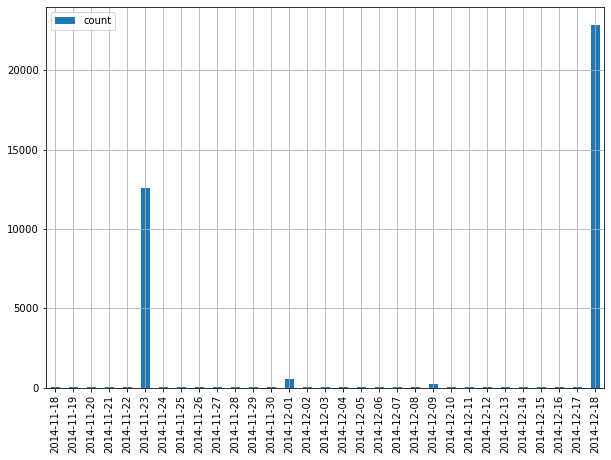

In [122]:
# 可视化
show_by_day(df)